In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn
seaborn.set()

p.43

In [2]:
G = nx.DiGraph()
G.add_nodes_from(['A', 'B1', 'B2', 'C1', 'C2', 'C3', 'D'])
G.add_weighted_edges_from([('A','B1',2),('A','B2',4),('B1','C1',3),\
                           ('B1','C2',3),('B1','C3',1),('B2','C1',2),\
                           ('B2','C2',3),('B2','C3',1),('C1','D',1),\
                           ('C2','D',3),('C3','D',4)])

In [3]:
print(nx.dijkstra_path(G, 'A', 'D'))
print(nx.dijkstra_path_length(G, 'A', 'D'))

['A', 'B1', 'C1', 'D']
6


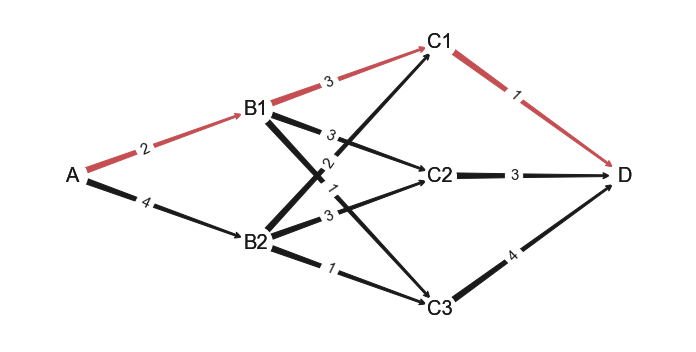

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.patch.set_facecolor('w')
pos = {'A':[0, 0], 'B1':[1, 1], 'B2':[1, -1], 'C1':[2, 2], 'C2':[2, 0],\
       'C3':[2, -2], 'D': [3, 0]}
edge_labels = dict([((u, v), d['weight']) for u, v, d in G.edges(data=True)])
red_edges = nx.path_graph(nx.dijkstra_path(G, 'A', 'D')).edges
black_edges = [edge for edge in G.edges() if edge not in red_edges]
nx.draw_networkx_edge_labels(G, pos, label_pos=0.6, ax=ax,\
                             edge_labels=edge_labels, font_size=15)
nx.draw_networkx(G, pos, ax=ax, arrowstyle='fancy', edgelist=red_edges,\
                 arrowsize=15, font_size=20, node_size=1000,\
                 node_color='w', edge_color='r')
nx.draw_networkx(G, pos, ax=ax, arrowstyle='fancy', edgelist=black_edges,\
                 arrowsize=15, font_size=20, node_size=1000, node_color='w')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

p.44

In [5]:
G = nx.Graph()
G.add_nodes_from(range(1, 12))
G.add_weighted_edges_from([(1,2,2),(1,3,8),(1,4,1),\
                           (2,5,1),(2,3,6),\
                           (3,5,5),(3,6,1),(3,7,2),(3,4,7),\
                           (4,7,9),\
                           (5,8,2),(5,9,9),(5,6,3),\
                           (6,9,6),(6,7,4),\
                           (7,9,3),(7,10,1),\
                           (8,11,9),(8,9,7),\
                           (9,11,2),(9,10,1),\
                           (10,11,4)])

In [6]:
print(nx.dijkstra_path(G, 1, 11))
print(nx.dijkstra_path_length(G, 1, 11))

[1, 2, 5, 6, 3, 7, 10, 9, 11]
13


D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


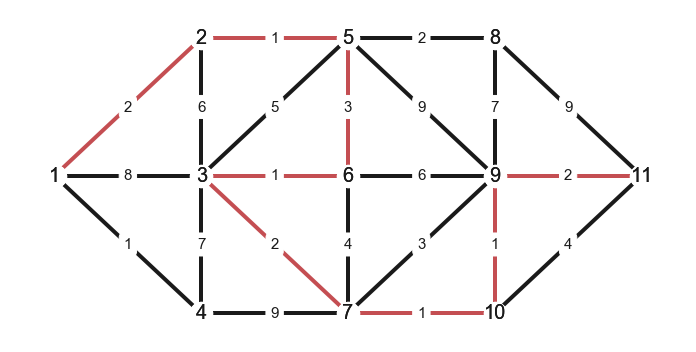

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.patch.set_facecolor('w')
pos = {1:[-2, 0], 2:[-1, 1], 3:[-1, 0], 4:[-1, -1], 5:[0, 1], 6:[0, 0],\
      7:[0, -1], 8:[1, 1], 9:[1, 0], 10:[1, -1], 11:[2, 0]}
edge_labels = dict([((u, v), d['weight']) for u, v, d in G.edges(data=True)])
red_edges = nx.path_graph(nx.dijkstra_path(G, 1, 11)).edges
black_edges = [edge for edge in G.edges() if edge not in red_edges]
nx.draw_networkx_edge_labels(G, pos, label_pos=0.5, ax=ax,\
                             edge_labels=edge_labels, font_size=15, rotate=False)
nx.draw_networkx(G, pos, ax=ax, edgelist=red_edges, node_size=500,\
                 node_color='w', edge_color='r', font_size=20, width=4)
nx.draw_networkx(G, pos, ax=ax, edgelist=black_edges, node_size=500,\
                 node_color='w', font_size=20, width=4)
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

p.45

In [8]:
G = nx.Graph()
G.add_nodes_from(range(1, 7))
G.add_weighted_edges_from([(1,2,50),(1,4,40),(1,5,25),(1,6,10),\
                           (2,3,15),(2,4,20),(2,6,25),\
                           (3,4,10),(3,5,20),\
                           (4,5,10),(4,6,25),\
                           (5,6,55)])

In [9]:
print(nx.floyd_warshall_numpy(G))

[[ 0. 35. 45. 35. 25. 10.]
 [35.  0. 15. 20. 30. 25.]
 [45. 15.  0. 10. 20. 35.]
 [35. 20. 10.  0. 10. 25.]
 [25. 30. 20. 10.  0. 35.]
 [10. 25. 35. 25. 35.  0.]]


In [10]:
predecessors = nx.floyd_warshall_predecessor_and_distance(G)[0]
for i in range(2, 7):
    print(nx.reconstruct_path(1, i, predecessors), nx.floyd_warshall(G)[1][i])

[1, 6, 2] 35
[1, 5, 3] 45
[1, 5, 4] 35
[1, 5] 25
[1, 6] 10


p.48

In [11]:
G = nx.Graph()
G.add_nodes_from(range(1, 8))
G.add_weighted_edges_from([(1,2,50),(1,3,60),\
                           (2,4,65),(2,5,40),\
                           (3,4,52),(3,7,45),\
                           (4,5,50),(4,6,30),(4,7,42),\
                           (5,6,70)])

In [12]:
print(nx.minimum_spanning_tree(G, algorithm='prim').edges)

[(1, 2), (2, 5), (3, 7), (4, 5), (4, 6), (4, 7)]


D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


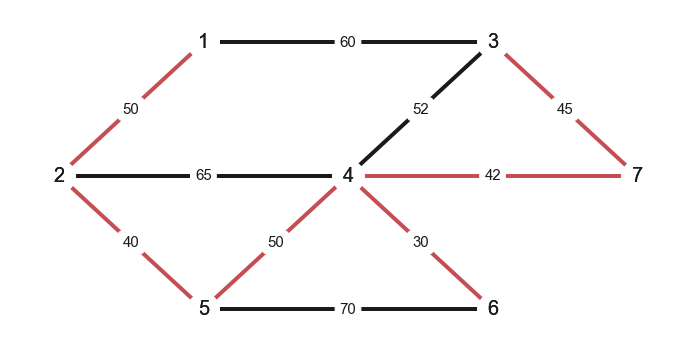

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.patch.set_facecolor('w')
pos = {1:[-1, 1], 2:[-2, 0], 3:[1, 1], 4:[0, 0], 5:[-1, -1], 6:[1, -1], 7:[2, 0]}
edge_labels = dict([((u, v), d['weight']) for u, v, d in G.edges(data=True)])
red_edges = nx.minimum_spanning_tree(G, algorithm='prim').edges
black_edges = [edge for edge in G.edges() if edge not in red_edges]
nx.draw_networkx_edge_labels(G, pos, label_pos=0.5, ax=ax,\
                             edge_labels=edge_labels, font_size=15, rotate=False)
nx.draw_networkx(G, pos, ax=ax, edgelist=red_edges, node_size=1000,\
                 node_color='w', edge_color='r', font_size=20, width=4)
nx.draw_networkx(G, pos, ax=ax, edgelist=black_edges, node_size=1000,\
                 node_color='w', font_size=20, width=4)
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

p.51

In [14]:
G = nx.DiGraph()
G.add_nodes_from(['s', 'v1', 'v2', 'v3', 'v4', 't'])
G.add_edge('s','v1',capacity=8,weight=2)
G.add_edge('s','v3',capacity=7,weight=8)
G.add_edge('v1','v2',capacity=9,weight=2)
G.add_edge('v1','v3',capacity=5,weight=5)
G.add_edge('v2','v3',capacity=2,weight=1)
G.add_edge('v2','t',capacity=5,weight=6)
G.add_edge('v3','v4',capacity=9,weight=3)
G.add_edge('v4','v2',capacity=6,weight=4)
G.add_edge('v4','t',capacity=10,weight=7)

In [15]:
print(nx.maximum_flow_value(G,'s','t'))

14


p.53

In [16]:
print(nx.cost_of_flow(G, nx.algorithms.max_flow_min_cost(G,'s','t')))

205
